In [421]:
%load_ext autoreload
%autoreload 2

import numpy as np
import vegas as vg
import gvar as gv
import random
from scipy import interpolate
import scipy.stats
from scipy.integrate import quad

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from matplotlib.pyplot import *
from matplotlib.legend_handler import HandlerLine2D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [422]:
from dark_news import *

In [423]:
BSMparams = model.model_params()

BSMparams.Ue4 = 0.0
BSMparams.Umu4 = np.sqrt(2.7e-7)
BSMparams.Utau4 = 0.0
BSMparams.Ue5 = 0.0
BSMparams.Umu5 = 0.0
BSMparams.Utau5 = 0.0
BSMparams.Ue6 = 0.0
BSMparams.Umu6 = 0.0
BSMparams.Utau6 = 0.0
BSMparams.UD4 = 1.0
BSMparams.UD5 = 0.0
BSMparams.UD6 = 0.0
BSMparams.m4 = 0.140
BSMparams.m5 = 1e6
BSMparams.m6 = 1e6
BSMparams.Mzprime = 1.25
BSMparams.D_or_M = 'majorana'
BSMparams.epsilon = np.sqrt(4.6e-4)

In [357]:
EMAX=2
EPOINTS=200
HEL = -1 
E = np.linspace(0.1, EMAX, EPOINTS)

sigma_C = np.array([xsecs.get_sigma_zprime(BSMparams, Enu, MA=12, Z=6, nu_produced=pdg.neutrino4, h_upscattered=HEL) for Enu in E ])
sigma_Pb = np.array([xsecs.get_sigma_zprime(BSMparams, Enu, MA=207, Z=82, nu_produced=pdg.neutrino4, h_upscattered=HEL) for Enu in E ])

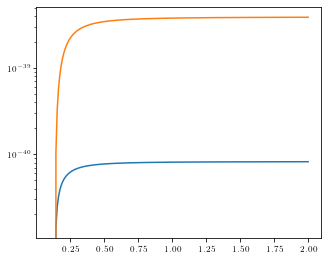

In [358]:
plt.plot(E, sigma_C)
plt.plot(E, sigma_Pb)
plt.yscale("log")

### fluxes

In [361]:
MB = exp.experiment('miniboone')
MBflux = MB.get_flux_func()
ND = exp.experiment('nd280_nu')
NDflux = ND.get_flux_func()

<ipython-input-439-d6598073ac50>:6: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
<ipython-input-439-d6598073ac50>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]
<ipython-input-439-d6598073ac50>:65: RuntimeWarning: invalid value encountered in true_divide
  ratio_xsec = sigma_Pb/sigma_C


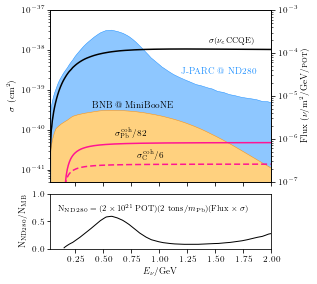

In [439]:
fsize = 9
rc('text', usetex=True)
params={'axes.labelsize':fsize,'xtick.labelsize':fsize,'ytick.labelsize':fsize,\
				'figure.figsize':(1.5*3.4, 1.8*2.3617)	}
rc('font',**{'family':'serif', 'serif': ['computer modern roman']})
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{bm}"]

rcParams.update(params)
axes_form  = [0.18,0.17+0.2,0.60,0.56]

fig = plt.figure()
ax2 = fig.add_axes(axes_form)
ax = ax2.twinx()
 # ax.yaxis.tick_right() 
 # ax2.yaxis.tick_left() 
ax2.set_zorder(ax.get_zorder() + 1)
ax2.patch.set_visible(False)



ax2.plot(E, sigma_Pb/82.0, c='deeppink', lw=1.5, zorder=10)
ax2.plot(E, sigma_C/6, dashes=(4,2), c='deeppink', lw=1.5, zorder=10)
e_ccqe, sigma_ccqe = np.loadtxt("data/quasielastic_electron_neutrino_cross_section.dat", unpack = True)
ax2.plot(np.append(0.0,e_ccqe), np.append(1e-4,sigma_ccqe)*1e-38, ls="-", c='black', lw=1.5, label = r'SM $\nu_e$CCQE ($1 n$)')
# 


###########################
# FLUXES
e_int = np.linspace(0.005,3,500)
units = 1e4

###### PLOT MINIBOONE
s2 = ax.fill_between(e_int, np.zeros(np.size(e_int)), MBflux(e_int)*units, lw = 0.5, edgecolor="None", facecolor="orange", alpha=0.5, zorder=-1)
s2 = ax.plot(e_int, MBflux(e_int)*units, lw = 0.5, color="darkorange", zorder=5)
###### PLOT T2K -- ND280
fluxND = NDflux(e_int)*units
s2 = ax.fill_between(e_int, MBflux(e_int)*units, fluxND, lw = 0.0, edgecolor="None", facecolor="dodgerblue", alpha=0.5, zorder=1)
s2 = ax.plot(e_int, fluxND, lw = 0.5, color="dodgerblue", zorder=5)

## labels
ax.set_ylabel(r'Flux ($\nu/{\rm m}^2/{\rm GeV}/{\rm \textsc{pot}}$)')
ax.set_yscale('log')
ax.set_ylim(1e-7,1e-3)

## labels
ax2.set_ylabel(r'$\sigma$ (cm$^2)$')
ax2.set_yscale("log")
ax2.set_ylim(5e-42, 1e-37)
ax2.set_xlim(0.025, EMAX)
ax2.set_xticklabels([])


ax2.annotate(r"{$\sigma$($\nu_e$CCQE)}", fontsize=fsize*0.9, xy=(1.45, 1.5e-38), rotation=0., color="black", rotation_mode='anchor')
ax2.annotate(r"$\sigma_{\rm Pb}^{\rm coh}/82$", fontsize=fsize, xy=(0.6, 1.8e-40/2.7), rotation=0, color="black", rotation_mode='anchor')
ax2.annotate(r"$\sigma_{\rm C}^{\rm coh}/6$", fontsize=fsize, xy=(0.8, 5e-41/2.7), rotation=0, color="black", rotation_mode='anchor')
ax2.annotate(r"BNB @ MiniBooNE", fontsize=fsize, xy=(0.4, 0.9e-39/2.5), rotation=0, color="black", rotation_mode='anchor')
ax2.annotate(r"J-PARC @ ND280", fontsize=fsize, xy=(1.2, 1e-38/4), rotation=0, color="dodgerblue", rotation_mode='anchor')

# plt.title(r"$m_{\rm HNL} = 100$~MeV,\qquad $|U_{\mu 4}|^2 \alpha_D \epsilon^2 = 3\times 10^{-11}$", fontsize=fsize)


# T2K/MB
ratio_xsec = sigma_Pb/sigma_C
ratio_flux =  NDflux(E)/MBflux(E)
ratio_targets= (2/208)/(818/14)
ratio_POT = 20e20/18.75e20
# 
ratio_events = ratio_targets*ratio_xsec*ratio_flux*ratio_POT


axes_form  = [0.18,0.15,0.60,0.18]

ax3 = fig.add_axes(axes_form)
ax3.patch.set_visible(False)
ax3.plot(E, ratio_events, c='black', lw=1) 
ax3.set_xlim(0.025, EMAX)
ax3.set_ylim(0.0, 1)
ax3.set_ylabel(r'${\rm N}_{\rm ND280} / {\rm N}_{\rm MB}$')
ax3.set_xlabel(r'$E_\nu$/GeV')

ax3.annotate(r"N$_{\rm ND280} = (2 \times 10^{21}\,{\rm POT})(2~{\rm tons} / m_{\rm Pb})({\rm Flux }\times \sigma)$", 
             fontsize=fsize*0.9, xy=(0.09, 0.7), rotation=0, color="black", rotation_mode='anchor')


# plt.savefig("plots/cross_sections_nicolo.pdf")
# 
plt.savefig("exp_analysis/poster_plots/cross_sections_nicolo.png", dpi=400)

# ratio of number of events

<ipython-input-324-b9bad5acd7a8>:7: RuntimeWarning: invalid value encountered in true_divide
  ratio_xsec = sigma_Pb/sigma_C


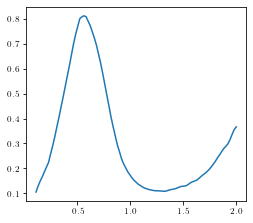

In [324]:
axes_form  = [0.18,0.17,0.60,0.76]

fig = plt.figure()
ax = fig.add_axes(axes_form)



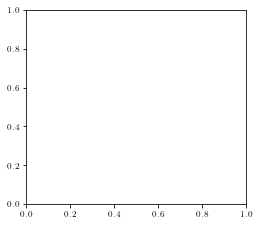

In [315]:
axes_form  = [0.18,0.17,0.60,0.76]

fig = plt.figure()
ax2 = fig.add_axes(axes_form)